In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
1.fitting it to the periodic function

2.plot the fit


Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, "Tempreature('C)")

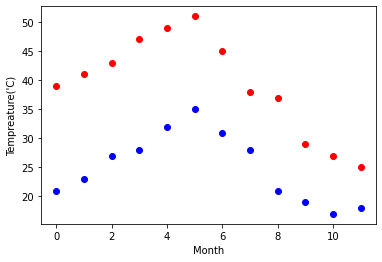

In [2]:
max_ = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_ = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
plt.plot(max_, 'ro')
plt.plot(min_, 'bo')
plt.xlabel("Month")
plt.ylabel("Tempreature('C)")


fitting it to the periodic function

In [3]:
from scipy import optimize
months = np.arange(12)
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_, [-40, 20, 0])

plot the fit

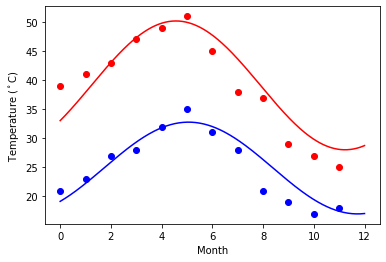

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

This assignment is for visualization using matplotlib:
    
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
Data_titanic =pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [6]:
Data_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

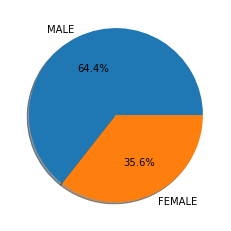

In [7]:
sex_count=Data_titanic["sex"].value_counts()
values_count=sex_count.values
fig,ax1=plt.subplots()
ax1.pie(values_count,labels=["MALE","FEMALE"],autopct="%1.1f%%",shadow=True)
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<AxesSubplot:xlabel='fare', ylabel='age'>

<Figure size 432x288 with 0 Axes>

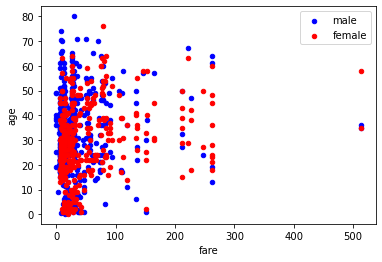

In [8]:
plt.figure()
sex_category=Data_titanic[Data_titanic["sex"]=="male"].plot.scatter("fare","age",color="b",label="male")
Data_titanic[Data_titanic["sex"]=="female"].plot.scatter("fare","age",color='r',label="female" ,ax=sex_category)
